In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df = df.drop(['RowNumber' , 'Surname' , 'CustomerId'] , axis=1)

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
geography = pd.get_dummies(df['Geography'] , drop_first = True)
gender = pd.get_dummies(df['Gender'] , drop_first = True)

In [17]:
df.drop(['Geography' ,'Gender' ] , axis=1 , inplace=True)

In [18]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [22]:
df = pd.concat([df, geography , gender] , axis=1)

In [23]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [55]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Germany              uint8
Spain                uint8
Male                 uint8
dtype: object

In [24]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]

In [25]:
Y = df['Exited']

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [28]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [29]:
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow-intel==2.11.0

  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [32]:
import keras

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
classifier = Sequential()

In [36]:
classifier.add(Dense(activation='relu' , input_dim = 11 , units=6 , kernel_initializer='uniform'))

In [37]:
classifier.add(Dense(activation='relu' , units=6 , kernel_initializer = 'uniform'))

In [38]:
classifier.add(Dense(activation='sigmoid' , units=1 , kernel_initializer='uniform'))

In [41]:
classifier.compile(optimizer = 'adam' ,loss='binary_crossentropy' , metrics=['accuracy'])

In [42]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [43]:
classifier.fit(X_train , y_train , batch_size=10 , epochs = 50)

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 0.4892 - accuracy: 0.7963
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4281 - accuracy: 0.7973
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4218 - accuracy: 0.8044
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4186 - accuracy: 0.8247
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4160 - accuracy: 0.8283
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4141 - accuracy: 0.8299
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4133 - accuracy: 0.8311
Epoch 8/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4120 - accuracy: 0.8324
Epoch 9/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4108 - accuracy: 0.8340
Epoch 10/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4102 - accuracy: 0.8345

In [44]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

79/79 [==============================] - 0s 2ms/step


In [48]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [49]:
cm = confusion_matrix(y_test , y_pred)

In [50]:
cm

array([[1936,   47],
       [ 363,  154]], dtype=int64)

In [51]:
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.836

In [52]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1983
           1       0.77      0.30      0.43       517

    accuracy                           0.84      2500
   macro avg       0.80      0.64      0.67      2500
weighted avg       0.83      0.84      0.81      2500



In [53]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

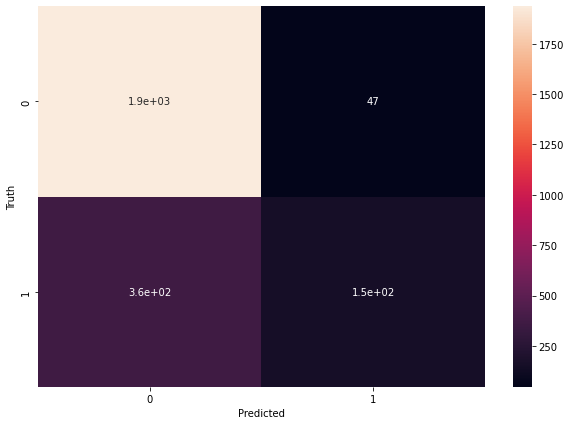

In [54]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')